In [4]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

In [67]:
df_da = df[df['job_title_short']=='Data Analyst'].copy()
df_da['job_posted_month_no'] = df['job_posted_date'].dt.month

In [68]:
df_da_exploded = df_da.explode('job_skills')
df_da_pivot = df_da_exploded.pivot_table(index='job_posted_month_no',columns='job_skills',aggfunc='size')


In [69]:
df_da_pivot.loc['Total'] = df_da_pivot.sum()
df_da_pivot = df_da_pivot[df_da_pivot.loc['Total'].sort_values(ascending=False).index]
df_da_pivot = df_da_pivot.drop(['Total'])
df_da_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,xamarin,mattermost,gtx,esquisse,chainer,capacitor,nuxt.js,msaccess,ovh,suse
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,11336.0,8170.0,6606.0,5596.0,4285.0,3607.0,3830.0,1880.0,1778.0,1251.0,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
2,7947.0,5772.0,4751.0,3936.0,3307.0,2576.0,2634.0,1291.0,1235.0,954.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7868.0,5675.0,4741.0,4051.0,3176.0,2650.0,2554.0,1266.0,1203.0,892.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,7553.0,5496.0,4557.0,3776.0,3106.0,2399.0,2598.0,1190.0,1177.0,947.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
5,6617.0,4773.0,4070.0,3245.0,2695.0,2093.0,1940.0,979.0,957.0,851.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
6,7584.0,5724.0,4707.0,3812.0,3275.0,2442.0,2174.0,1173.0,1237.0,987.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7687.0,5513.0,4831.0,3928.0,3350.0,2444.0,2118.0,1096.0,1069.0,996.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8823.0,6482.0,5576.0,4533.0,3859.0,2975.0,2560.0,1332.0,1298.0,1117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,6829.0,4886.0,4229.0,3446.0,3118.0,2146.0,1880.0,944.0,945.0,852.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


在一个Data Frame， 如果想根据某一行的值去排序列，标准做法是
df[df.loc['某一行'].sort_values(ascending=False).index]

In [70]:
df_da_pivot = df_da_pivot.reset_index()
df_da_pivot['job_posted_month'] = df_da_pivot['job_posted_month_no'].apply(lambda month: pd.to_datetime(month, format='%m').strftime('%B'))

In [71]:
df_da_pivot = df_da_pivot.drop(columns='job_posted_month_no')
df_da_pivot = df_da_pivot.set_index('job_posted_month')

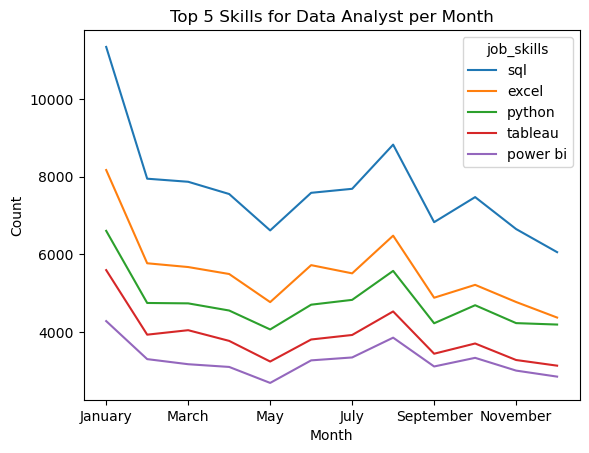

In [82]:
df_da_pivot.iloc[:, :5].plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Top 5 Skills for Data Analyst per Month')
plt.legend
plt.show()
